In [1]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
def multi_normal(x: np.ndarray, mu: np.ndarray, Sigma: np.ndarray, d: int) -> np.ndarray:
    a = 1/np.sqrt(np.power(2*np.pi, d)*np.linalg.det(Sigma))
    b = np.linalg.solve(np.linalg.inv(Sigma), (x-mu)).T.dot(x-mu)
    return a * np.exp(-b/2)

In [13]:
def generate_surface(mu: np.ndarray, Sigma: np.ndarray, d: int, n_mesh: int=1000):
    x_1 = np.linspace(3, 9, num=n_mesh)
    x_2 = np.linspace(3, 9, num=n_mesh)
    x_1, x_2 = np.meshgrid(x_1, x_2)
    pdf = np.zeros((n_mesh, n_mesh))

    for i in range(n_mesh):
        for j in range(n_mesh):
            x = np.array([
                x_1[i, j],
                x_2[i, j]
            ])
            a = multi_normal(x, mu, Sigma, d)
            pdf[i, j] = a
    return x_1, x_2, pdf

In [4]:
iris = load_iris()
X = iris.data[:, 0:2]
X.shape

(150, 2)

In [14]:
dim = 2
mu = X.mean(axis=0)
Sigma = np.cov(X, rowvar=0)

In [15]:
x_1, x_2, pdf = generate_surface(mu, Sigma, dim)

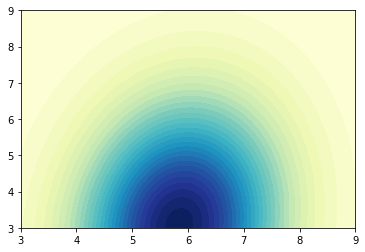

In [16]:
plt.contourf(x_1, x_2, pdf, 33, cmap=cm.YlGnBu)